In [16]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.metrics import mean_absolute_percentage_error
segment_size = 100

# Calculate the number of segments in the dataset
num_segments = 17
# Đọc vào tập dữ liệu bị phân mảnh ngang
data_chunks = []
for i in range(num_segments):
    chunk = pd.read_csv(f'STB.csv')
    data_chunks.append(chunk)
data = pd.concat(data_chunks, ignore_index=True)

# Áp dụng moving average với cửa sổ 5 và lưu vào cột 'ma_5'
data['ma_5'] = data['close_price'].rolling(window=5).mean()

# Xóa bỏ các dòng có giá trị null do moving average
data.dropna(inplace=True)

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
train_data = data.sample(frac=0.8, random_state=42)
test_data = data.drop(train_data.index)

# Sử dụng Random Forest Regressor để dự đoán biến mục tiêu
from sklearn.ensemble import RandomForestRegressor

X_train = train_data.drop(['trunc_time','open_price','high_price','low_price' ,'volume' ,'close_price' ], axis=1)
# X_train = train_data.drop(['open_price'], axis=1)
# X_train = train_data.drop(['high_price'], axis=1)
# X_train = train_data.drop(['low_price'], axis=1)
# X_train = train_data.drop(['volume'], axis=1)
y_train = train_data['close_price']

print(X_train)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Đánh giá kết quả trên tập kiểm tra
X_test = test_data.drop(['trunc_time','open_price','high_price','low_price','volume' ,'close_price' ], axis=1)
y_test = test_data['close_price']
print("y_test")
print(test_data)
y_pred = rf.predict(X_test)
print("y_test",y_test)
print("y_pred",y_pred)


mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared error: {mse}')

         ma_5
3111  19960.0
4443  24740.0
3137  23260.0
3321  18690.0
8426  32060.0
...       ...
3465  26670.0
903   33690.0
211   30660.0
8189  22550.0
462   25180.0

[7300 rows x 1 columns]
y_test
      trunc_time  open_price  high_price  low_price  close_price    volume   
5     2020-10-13       13300       13600      13200        13450  12669050  \
6     2020-10-14       13500       13750      13350        13500  12364650   
8     2020-10-16       13850       13950      13700        13750  13048220   
9     2020-10-19       13800       14300      13750        14100  20547610   
13    2020-10-23       14800       14800      14500        14550  13634620   
...          ...         ...         ...        ...          ...       ...   
9110  2022-11-01       16500       17250      16350        16900  29458400   
9111  2022-11-02       16900       17300      16750        16900  19123400   
9115  2022-11-08       15500       16550      15300        16450  22034700   
9116  2022-11-09    

In [17]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# calculate metrics for train data
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

# calculate metrics for test data
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# print results
print(f'Train RMSE: {rmse_train:.2f}')
print(f'Train MSE: {mse_train:.2f}')
print(f'Train MAE: {mae_train:.2f}')

print(f'Test RMSE: {rmse_test:.2f}')
print(f'Test MSE: {mse_test:.2f}')
print(f'Test MAE: {mae_test:.2f}')

Train RMSE: 285.02
Train MSE: 81237.49
Train MAE: 97.82
Test RMSE: 290.15
Test MSE: 84187.79
Test MAE: 100.14


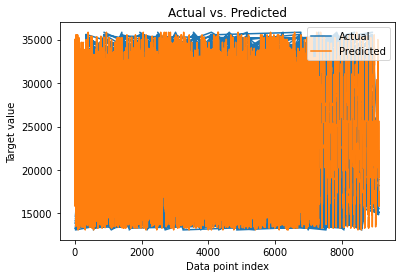

In [18]:
import matplotlib.pyplot as plt

# plot actual and predicted values for all data, train data, and test data
plt.plot(y_train, label='Actual')
plt.plot(np.concatenate((y_train_pred, y_test_pred)), label='Predicted')
plt.title('Actual vs. Predicted')
plt.xlabel('Data point index')
plt.ylabel('Target value')
plt.legend(['Actual', 'Predicted'])
plt.show()

MSE: 5712024.5359996
RMSE: 2389.984212500074
MAE: 1743.0933493589741


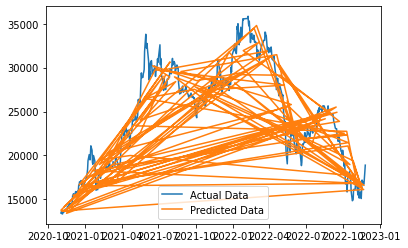

In [19]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# read stock price data from CSV file
df = pd.read_csv('../Dataset/STB.csv')

# convert date column to datetime format
df['trunc_time'] = pd.to_datetime(df['trunc_time'])

# set date column as index
df.set_index('trunc_time', inplace=True)

# calculate 20-day moving average
df['MA20'] = df['close_price'].rolling(window=20).mean()

# drop rows with missing values
df.dropna(inplace=True)

# split data into features and target
X = df[['MA20']]
y = df['close_price']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# make predictions on the test data
y_pred = model.predict(X_test)

# calculate and print evaluation metrics
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))

# plot the actual and predicted stock prices
plt.plot(df.index, df['close_price'], label='Actual Data')
plt.plot(X_test.index, y_pred, label='Predicted Data')
plt.legend()
plt.show()


In [4]:
import numpy as np

def running_mean(l, N):
    if (N//2)*2 == N:
        N = N - 1
    front = np.zeros(N//2)
    back = np.zeros(N//2)
    
    for i in range (1,(N//2)*2,2):
        front[i//2:i//2+len(np.convolve(l[:i], np.ones((i,))/i, mode = 'valid'))] = np.convolve(l[:i], np.ones((i,))/i, mode = 'valid')
        back[-(i//2+len(np.convolve(l[-i:], np.ones((i,))/i, mode = 'valid'))):-i//2] = np.convolve(l[-i:], np.ones((i,))/i, mode = 'valid')
        
    middle = np.convolve(l, np.ones((N,))/N, mode = 'valid')
    if len(middle) % 2 != 0:
        middle = np.concatenate(([middle[0]], middle, [middle[-1]]))
        
    return np.concatenate([front, middle, back[::-1]])

print(running_mean([2, 4, 6, 8, 10], 3))


[2. 4. 4. 6. 8. 8. 0.]
